# Exploratory Computing with Python

## Statistics Notebook 2: Continuous random variables

In this notebook we deal with continuous distributions. In the first half of the notebook we analyze data that we generate ourselves. In the second half we start looking at measured data.

The most common probability distribution is probably (no pun intended) the Normal distribution. Random numbers from a Normal distribution may be generated with the `standard_normal` function in the `random` subpackage of `numpy`. The numbers are drawn from a "standard" Normal distribution, which means a Normal distribution with mean 0 and standard deviation 1. The mean and standard deviation of a dataset can be computed with the functions `mean` and `std`.

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

def axvline(val, **kwargs):
    ax = plt.gca()
    ylim = ax.get_ylim()
    return plt.plot([val, val], ylim, **kwargs)

plt.axvline = axvline

In [2]:
@interact(N=(1, 1000))
def plot_mean_and_std(N):
    data = np.random.standard_normal(N)  # Array with 100 values
    print('mean of data: ', np.mean(data))
    print('standard deviation of data: ', np.std(data))

interactive(children=(IntSlider(value=500, description='N', max=1000, min=1), Output()), _dom_classes=('widget…

Note that the mean and standard deviation are not exactly equal to 0 and 1, respectively. These are, after all, only estimates of the true underlying mean and standard deviation. These estimates are called the sample mean and sample standard deviation (of 100 numbers drawn from a Normal distribution). Run the above code several times. Each time, a new set of 100 random numbers is drawn, with a slightly different mean and standard deviation. We'll get back to that later. 

To generate numbers from a Normal distribution with mean $\mu$ and standard deviation $\sigma$, draw numbers from the standard Normal distribution, multiply all values by $\sigma$ and then add $\mu$ (see end of Section 7.4 in Statistics book by Dekking et al.).

In [3]:
@interact(N=(1, 1000), mu=(-100, 100))
def plot_mean_and_std(N, mu):
    data = np.random.standard_normal(N) + mu  # Array with 100 values
    print('mean of data: ', np.mean(data))
    print('standard deviation of data: ', np.std(data))

interactive(children=(IntSlider(value=500, description='N', max=1000, min=1), IntSlider(value=0, description='…

When you obtain a new data set, one of the first things to do is to look at the data. One way to do that is to draw a histogram. For a histogram, you count how many data points fall within a certain interval. For example, how many data points are within 5 and 6. These intervals are called bins. The bar graph of the number of data points in each bin is called a histogram. The function to compute and plot a histogram is called `hist`. The simplest way of plotting a histogram is to let `hist` decide what bins to use; the default number of bins is `nbin=10`; `hist` even figures out where to put the limits of the bins. The `hist` function creates a histogram graph and returns a tuple of three items. The first item is an array of length `nbin` with the number of data points in each bin. The second item is an array of length `nbin+1` with the limits of the bins. The third item is a list of objects that represent the bars of the histogram; we won't use this last item here. Note that with this size of a data base (100 data points), the histogram doesn't look too much like the typical bell-shaped curve of a Normal distribution, even though the data points are actually drawn from a real Normal distribution.

In [4]:
@interact(N=(10, 1000), mu=(-100, 100))
def plot_mean_and_std(N, mu):
    data = np.random.standard_normal(N) + mu
    a = plt.hist(data)
    plt.xlabel('bins')
    plt.ylabel('number of data points')
    print('mean of data: ', np.mean(data))
    print('standard deviation of data: ', np.std(data))
    print('number of data points in each bin: ',a[0])
    print('limits of the bins: ',a[1])

interactive(children=(IntSlider(value=505, description='N', max=1000, min=10), IntSlider(value=0, description=…

As you can see from the previous example (you can run it several times), the limits of the bins are not chosen as nice numbers: `hist` takes the minimum and maximum value of the data and divides it in `nbin` equal intervals. Alternatively, you can specify the number of bins with the `bins` keyword, and the range (minimum and maximum limits of the bins) with the `range` keyword. If data values are outside this range (such as outliers), they are ignored. In the code below, 12 bins are chosen equally spaced from 0 to 12. 

number of data points in each bin:  [  1.   2.   6.   9.  14.  18.  14.  10.   8.   6.   3.   4.]
limits of the bins:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


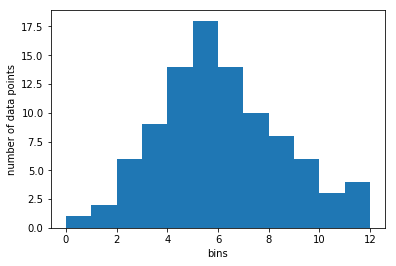

In [5]:
data = 3 * np.random.standard_normal(100) + 6.
a = plt.hist(data, bins = 12, range = (0,12))
print('number of data points in each bin: ',a[0])
print('limits of the bins: ',a[1])
plt.xlabel('bins')
plt.ylabel('number of data points');

A line representing the underlying normal distribution may be added as follows. First import the `norm` class from the `scipy.stats` package. Then call the `norm.pdf` function (pdf stands for probability density function) to compute the values of the normal distribution given three arguments: the $x$ values where to compute the normal distribution, the mean, and the standard deviation. Let's add the normal distribution to the histogram we just created. The one thing we have to change in the histogram is the vertical axis. In the graph above, the vertical axis shows the number of data points. We need to normalize this so that the vertical axis gives the probability that a data point lies in a bin. The histogram may be normalized by specifying the `normed = True` keyword:

In [6]:
from scipy.stats import norm
@interact(N=(500, 1000), mu=(-5, 5), sig=(1., 3))
def plot_mean_and_std(N, mu, sig):
    data = sig * np.random.standard_normal(N) + mu  # Array with N values
    a = plt.hist(data, bins = int(N/10), range = (- 10, +10), density=True)
    x = np.linspace(-10, 10, 100)
    y = norm.pdf(x, mu, sig) # mu=6, sig=2
    plt.plot(x, y, 'r')
    plt.xlabel('bins')
    plt.ylabel('probability')

interactive(children=(IntSlider(value=750, description='N', max=1000, min=500), IntSlider(value=0, description…

###Exercise 1: <a name="back1"></a>First histogram
Generate 1000 random numbers from a Normal distribution with mean 100 and standard deviation 10. Compute and print to the screen the mean and standard deviation of your data. Create two graphs above each other using the `subplot` command (use `help(subplot)` if you forgot how to do that). In the top graph, plot a histogram using 20 bins going from 50 to 150. Note that with this size of a data set (1000 data points), the histogram starts to look a lot more like the typical bell-shaped curve of a Normal distribution. Add a red line representing the probability density function of the underlying normal distribution to the graph. In the bottom graph, draw a histogram of the cumulative distribution function, by setting the keyword `cumulative = True` (see `help(hist)` for details). For the latter graph, it may also be nice to use the `histtype = 'step'` keyword. Add a red line representing the cumulative distribution function of the underlying normal distribution to the graph using the `norm.cdf` function, which works the same as the `norm.pdf` function but computes the cumulative distribution function (cdf). Finally, make sure the xlimits are the same for both graphs. 

<a href="#ex1answer">Answers to Exercise 1</a>

###Percentiles
Another useful description of a dataset are the percentiles or quantiles. For this we consider the ordered data, that is, we order the datapoints in ascending order (so the first datapoint is the minimum of the data and the last datapoint is the maximum). The 25 percentile is the data point in the ordered data such that 25% of the data is below this datapoint (and thus 75% is above this datapoint). The percentiles of a dataset are commonly referred to as the 'empirical percentiles' as they are the percentiles of the dataset, not of the underlying distribution. The 50 empirical percentile is equivalent to the median of the data. Common intervals to look at are the 50% region around the median (also called the interquartile range or IQR), which runs from the 25 empirical percentile to the 75 empirical percentile, and the 95% region, which runs from the 2.5 empirical percentile to the 97.5 empirical percentile. Percentiles of a dataset may be computed with the `percentile` function in the `numpy` package. The first argument is the data, the second argument is a list of percentiles:

In [7]:
@interact(N=(50, 150), mu=(5, 15), sig=(1., 3))
def plot_mean_and_std(N, mu, sig):
    data = sig * np.random.standard_normal(N) + mu  # Array with 100 values
    lower, median, upper = np.percentile(data, [2.5, 50, 97.5])
    print('2.5 percentile: ', lower)
    print('50 percentile: ', median)
    print('97.5 percentile: ', upper)
    print('95% interval: ', lower, ' to ', upper)

interactive(children=(IntSlider(value=100, description='N', max=150, min=50), IntSlider(value=10, description=…

###Expercise 2. <a name="back2"></a>Lower and upper quartile
Generate 1000 data points from a normal distribution with a mean of 20 and a standard deviation of 4. Compute the interquartile range (25%-75% range). Compute the theoretical value of the interquartile range and compare it to the interquartile range of the data. Draw a histogram of the cumulative distribution. Add red vertical lines to your graph for the 25 and 75 empirical percentiles of the data, and black vertical lines for the true 25 and 75 percentiles. Vertical lines that span the graph may be added with the `axvline` function, which takes the $x$ value of the line as an argument. To specify the color of the vertical line, use the `color` keyword argument.

<a href="#ex2answer">Answers to Exercise 2</a>

###Box-whisker plots
Box-whisker plots (also simply referred to as boxplots) are a way to visualize the level and spread of the data. By simply looking at a boxplot, you can see whether the data is symmetric or not, and how widely the data are spread. A box-whisker plot may be created with the `boxplot` function in the `matplotlib` package as follows

In [8]:
@interact(N=(400, 600), mu=(5, 15), sigma=(1,5))
def plot_boxplot(N, mu, sigma):
    np.random.seed(10)
    data = sigma * np.random.standard_normal(N) + mu
    a = plt.boxplot(data)
    #plt.ylim((-10, 25))

interactive(children=(IntSlider(value=500, description='N', max=600, min=400), IntSlider(value=10, description…

The `boxplot` function creates the graph and returns a lot of stuff such as 'boxes', 'caps', etc. These latter ones are handles to the different features of the graph; we will not use them here. What you see in the graph is a red line at the median of the data. The blue box spans the IQR ranging from the lower quartile (25%) to the upper quartile (75%). The whiskers are the black lines that are connected to the 50% box with the blue dashed lines. They extend to the most extreme data point within the `whis*IQR` data range, where the default value of `whis` is 1.5. Any data points falling outside the whiskers are potential outliers and are plotted as crosses. In this case there are 5 points outside the whiskers, but none are outliers. They were, after all, drawn from a Normal distribution!

###Dataset of experiments on vowels

It is time to start applying our statistical techniques to data obtained from acoustic recordings.

A data set of acoustic analysis of vowel production is provided in the file `../data/verified_pb.data` (data courtesy: https://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/speech/database/pb/0.html). The file contains 8 columns separated by white space. The description of the columns are in the file `../data/HEADER`. The first column has the gender of the sample (`gender`), followed by: the identity (`speaker`), the phoneme number (`pid`), the phoneme (`phoneme`), the fundamental frequency in Hz (`F0`), the first formant in Hz (`F1`), the second formant in Hz (`F2`), and the third formant in Hz (`F3`).

###Exercise 3. <a name="back3"></a>Loading experimental data and basic operations
Load the data in the file `../data/verified_pb.data` using the `read_table` command of the `pandas` package (refer to `notebook_wm1` for an introduction into `pandas`). Carry out the following three tasks:

* Determine and report the minimum and maximum measured values of F0. 
* Determine and report the mean and standard deviation of the F1. 
* Determine and report the 2.5, 50, and 97.5 percentiles of the F3.

In [9]:
import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])
data.head()
# Finish this

,gender,speaker,pid,phoneme,F0,F1,F2,F3
0,1,1,1,IY,160.0,240.0,2280.0,2850.0
1,1,1,1,IY,186.0,280.0,2400.0,2790.0
2,1,1,2,IH,203.0,390.0,2030.0,2640.0
3,1,1,2,IH,192.0,310.0,1980.0,2550.0
4,1,1,3,EH,161.0,490.0,1870.0,2420.0


<a href="#ex3answer">Answers to Exercise 3</a>

###Exercise 4. <a name="back4"></a>Boxplot of F0
The fundamental frequency or F0, perceived as "pitch", is defined as the rate at which your vocal cords vibrate during vocalic sounds and is recorded in Hz. Compute and report the mean and standard deviation of F0, and make a box plot.

Now this dataset has a gender column. Make a boxplot of all the male speakers `data.gender==1`.

When you look at this last boxplot, it is obvious that there are many outliers. Create a new boxplot for all the data except for the most extreme outliers, for example by making a boxplot for all F0 data below a certain value. Make sure you choose correct limits for the vertical axis, so that the whiskers are visible.

<a href="#ex4answer">Answers to Exercise 4</a>

###Exercise 5. <a name="back5"></a>Histogram of F0
Now Create a histogram of F0. Add labels to the axes. Does the histogram look like a Normal distribution? If not, why, not?

<a href="#ex5answer">Answers to Exercise 5</a>

###Exercise 6. <a name="back6"></a>Normal distribution for F0
Let's try to fit a normal distribution to the F0 data. This is obviously not quite correct. Create a normalized histogram of F0. Compute the mean and standard deviation of the F0 data and plot on the same graph the Normal probability density function using these estimates of the mean and standard deviation. Now add normal probability density functions for male speakers, female speakers and children in separate figures. If you were given only F0 and asked to determine gender, who would be the easiest and hardest to separate?

<a href="#ex6answer">Answers to Exercise 6</a>

***

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

mean of data is:  99.8689929913
standard devaiation of data is:  9.63819276738


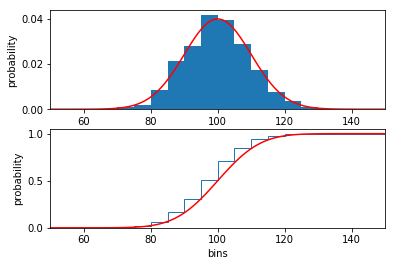

In [10]:
from scipy.stats import norm
mu = 100.0
sig = 10.0
data = sig * np.random.standard_normal(1000) + mu
print('mean of data is: ', np.mean(data))
print('standard devaiation of data is: ', np.std(data))
plt.subplot(211)
a = plt.hist(data, bins=20, range=(50,150), density=True)
x = np.linspace(50, 150, 100)
y = norm.pdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.ylabel('probability')
plt.subplot(212)
b = plt.hist(data, bins=20, range=(50,150), cumulative=True, histtype='step', density=True)
y = norm.cdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.xlabel('bins')
plt.ylabel('probability');

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

theoretical IQR:  17.3 22.7
IQR of data  17.2195630618 22.607677741


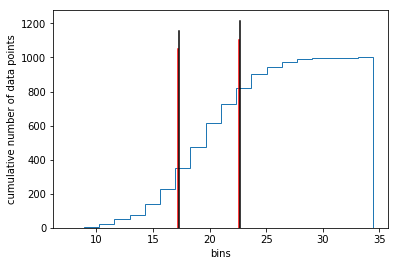

In [11]:
mu = 20.0
sig = 4.0
lower_theoretical = mu - 0.675 * sig
upper_theoretical = mu + 0.675 * sig
print('theoretical IQR: ',lower_theoretical, upper_theoretical)
data = sig * np.random.standard_normal(1000) + mu
lower, upper = np.percentile(data, [25, 75])
print('IQR of data ', lower, upper)
plt.hist(data, bins=20, cumulative=True, histtype='step')
plt.axvline(lower, color='r')
plt.axvline(upper, color='r')
plt.axvline(lower_theoretical, color='k')
plt.axvline(upper_theoretical, color='k')
plt.xlabel('bins')
plt.ylabel('cumulative number of data points');

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [12]:
import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])
data.head()

print('min and max F0: ', np.amin(data.F0), np.amax(data.F0))
print('mean and std of F1: ', np.mean(data.F1), np.std(data.F1))
print('2.5%, 50%, 97.5% F3: ', np.percentile(data.F3, [2.5, 50, 97.5]))

min and max F0:  91.0 350.0
mean and std of F1:  563.299342105 201.188084296
2.5%, 50%, 97.5% F3:  [ 1700.  2680.  3800.]


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

Mean of F0:  191.295394737
Std of F0:  60.3622723955


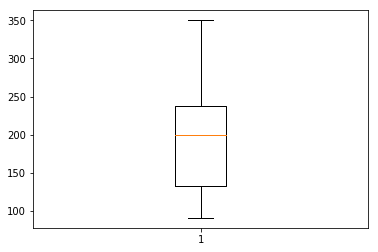

In [13]:
print('Mean of F0: ', data.F0.mean())
print('Std of F0: ', data.F0.std())
bp = plt.boxplot(data.F0)

Mean of F0:  131.26969697
Std of F0:  18.9793432131


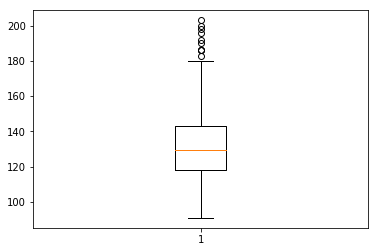

In [14]:
print('Mean of F0: ', data.F0[data.gender==1].mean())
print('Std of F0: ', data.F0[data.gender==1].std())
bp = plt.boxplot(data.F0[data.gender==1])

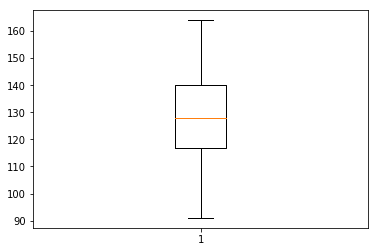

In [15]:
F0 = data.F0[data.gender==1]
bp = plt.boxplot(F0[F0 < 165])

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

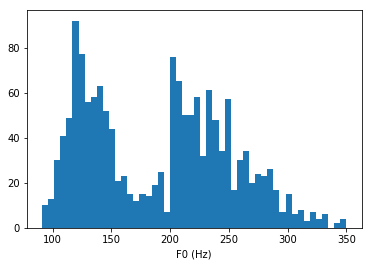

In [16]:
plt.hist(data.F0, bins=50)
ph = plt.xlabel('F0 (Hz)')

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

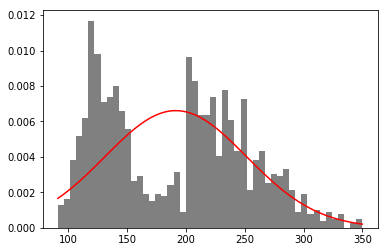

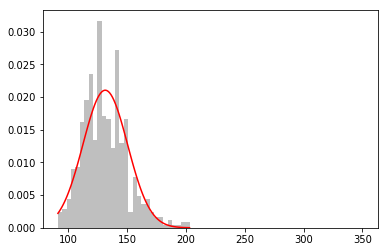

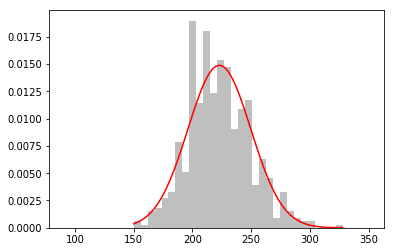

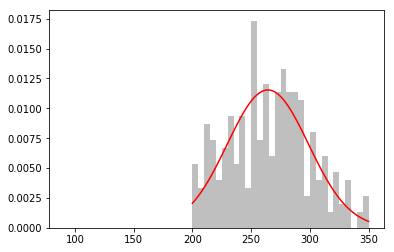

In [17]:
from scipy.stats import norm
plt.hist(data.F0, bins=50, density=True, color='gray')
meanF0 = np.mean(data.F0)
stdF0 = np.std(data.F0)
x = np.linspace(np.amin(data.F0), np.amax(data.F0), 100)
y = norm.pdf(x, loc=meanF0, scale=stdF0)
ph = plt.plot(x, y, 'r')
xlim = plt.gca().get_xlim()
for gender in np.unique(data.gender):
    plt.figure()
    F0 = data.F0[data.gender==gender]
    plt.hist(F0.values, bins=30, density=True, color='gray', alpha=0.5)
    plt.xlim(xlim)
    meanF0 = np.mean(F0)
    stdF0 = np.std(F0)
    x = np.linspace(np.amin(F0), np.amax(F0), 100)
    y = norm.pdf(x, loc=meanF0, scale=stdF0)
    ph = plt.plot(x, y, 'r')

<a href="#back6">Back to Exercise 6</a>

***